<a href="https://colab.research.google.com/github/norayehia/ECG_signal_-healthcarewithresnet50/blob/main/noraproject50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://stackoverflow.com/questions/49685924/extract-google-drive-zip-from-google-colab-notebook

In [ ]:
"""
!pip install zipfile
from  zipfile import ZipFile
import urllib.request
import zipfile
from io import BytesIO
with Zipfile('/content/drive/MyDrive/projectecg/archive.zip','r') as zipobj:
  zipobj.extractall('/content/drive/MyDrive/projectecg/nora')

  """

In [ ]:
import cv2
import glob
import pandas as pd
import numpy as np

from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline

import tensorflow.compat.v2 as tf
from keras import backend as k
from keras.applications.mobilenet import MobileNet
from keras.applications import imagenet_utils
import keras.applications
from keras.engine import training
from keras.layers import VersionAwareLayers
from keras.utils import data_utils
from keras.utils import layer_utils
from tensorflow.keras.utils import Sequence
from tensorflow.python.util.tf_export import keras_export
from keras.layers import Dense,GlobalAveragePooling2D
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import CSVLogger
from sklearn.metrics import classification_report
import seaborn as sns

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np




import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
%matplotlib inline

extract data from the zip file

In [ ]:
import zipfile
from google.colab import drive

drive.mount('/content/drive/')

zip_ref = zipfile.ZipFile("/content/drive/MyDrive/projectecg/archive.zip", 'r')
zip_ref.extractall("/content/drive/MyDrive/projectecg/data")
zip_ref.close()

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


https://pypi.org/project/split-folders/

split train into train and validation to use data generator to use less resorce when run model and use validation generator seprate from train to make suffle after split 

In [ ]:
pip install split-folders

In [ ]:
import splitfolders
input_folder = '/content/drive/MyDrive/projectecg/data/ECG_Image_data/train'
splitfolders.ratio(input_folder,output='/content/drive/MyDrive/projectecg/data/ECG_Image_data/trainvalidat2',seed=42,ratio=(.9,.1),group_prefix=None)

Copying files: 99199 files [1:25:39, 19.30 files/s]


get data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
trainpath = "/content/drive/MyDrive/data/ECG_Image_data/trainvalidat2/train"
classes = ['F', 'M', 'N', 'Q', 'S', 'V']

train_size = []

for folder_index,folder in enumerate(classes):
  train = glob.glob(trainpath + "/" + folder + "/*")
  train_size.append(len(train))

print(train_size)

[577, 7564, 68138, 5787, 2000, 5210]


In [ ]:
valpath = "/content/drive/MyDrive/data/ECG_Image_data/trainvalidat2/val"
classes = ['F', 'M', 'N', 'Q', 'S', 'V']

val_size = []

for folder_index,folder in enumerate(classes):
  val = glob.glob(valpath + "/" + folder + "/*")
  val_size.append(len(val))

print(val_size)

[65, 841, 7571, 644, 223, 579]


In [ ]:
testpath = "/content/drive/MyDrive/data/ECG_Image_data/test"
classes = ['F', 'M', 'N', 'Q', 'S', 'V']
test_size = []

for folder_index,folder in enumerate(classes):
  test = glob.glob(testpath + "/" + folder + "/*")
  test_size.append(len(test))

print(test_size)

[161, 2101, 18926, 1608, 556, 1447]


In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D,GlobalAveragePooling2D



https://keras.io/api/applications/#usage-examples-for-image-classification-models

In [ ]:
datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
generator = datagen.flow_from_directory(trainpath, target_size=(32, 32), batch_size=32, class_mode='categorical')

Found 89276 images belonging to 6 classes.


In [ ]:
val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
validation_generator = val_datagen.flow_from_directory(valpath,
    target_size=(32, 32), batch_size=32, class_mode='categorical') # set as validation data

Found 9923 images belonging to 6 classes.


In [ ]:
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_generator = test_datagen.flow_from_directory(testpath, target_size=(32, 32), batch_size=32, class_mode='categorical',shuffle=False)

Found 24799 images belonging to 6 classes.


In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np

model = ResNet50(weights='imagenet', include_top=False)
model.summary()

94781440/94765736 [==============================] - 0s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 conv1_conv (Conv2D)            (None, None, None,   9472        ['conv1_pad[0][0]']              
                          

In [ ]:
# importing the libraries
from keras.models import Model
from keras.layers import Flatten, Dense
#from keras.applications import VGG16
#from keras.preprocessing import image

IMAGE_SIZE = [32, 32]  # we will keep the image size as (64,64). You can increase the size for better results. 

# loading the weights of VGG16 without the top layer. These weights are trained on Imagenet dataset.
IMAGE_SIZE = [32, 32] 
rgg = ResNet50(input_shape = IMAGE_SIZE + [3], weights = 'imagenet', include_top = False)  # input_shape = (32,32,3) as required by VGG

# this will exclude the initial layers from training phase as there are already been trained.
for layer in rgg.layers:
    layer.trainable = False

x = Flatten()(rgg.output)
#x = Dense(128, activation = 'relu')(x)   # we can add a new fully connected layer but it will increase the execution time.
x = Dense(6,activation='softmax')(x)
  # adding the output layer with softmax function as this is a multi label classification problem.
model = Model(inputs = rgg.input, outputs = x)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


94781440/94765736 [==============================] - 1s 0us/step


In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 38, 38, 3)    0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 16, 16, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 16, 16, 64)   256         ['conv1_conv[0][0]']             
                                                                                              

In [ ]:

history = model.fit(generator, validation_data = validation_generator, epochs = 5)

Epoch 1/5
2790/2790 [==============================] - 22617s 8s/step - loss: 0.0127 - accuracy: 0.9969 - val_loss: 0.0015 - val_accuracy: 0.9994
Epoch 2/5
2790/2790 [==============================] - 765s 274ms/step - loss: 0.0014 - accuracy: 0.9996 - val_loss: 9.3023e-04 - val_accuracy: 0.9997
Epoch 3/5
2790/2790 [==============================] - 761s 273ms/step - loss: 0.0010 - accuracy: 0.9997 - val_loss: 0.0010 - val_accuracy: 0.9996
Epoch 4/5
2790/2790 [==============================] - 752s 269ms/step - loss: 5.4207e-04 - accuracy: 0.9998 - val_loss: 0.0171 - val_accuracy: 0.9951
Epoch 5/5
2790/2790 [==============================] - 743s 266ms/step - loss: 6.6312e-04 - accuracy: 0.9998 - val_loss: 0.0115 - val_accuracy: 0.9958


In [ ]:
#/content/drive/MyDrive/projectecg/outpvgg
model.save("/content/drive/MyDrive/noraproject/outpsgg1")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/noraproject/outpsgg1/assets


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


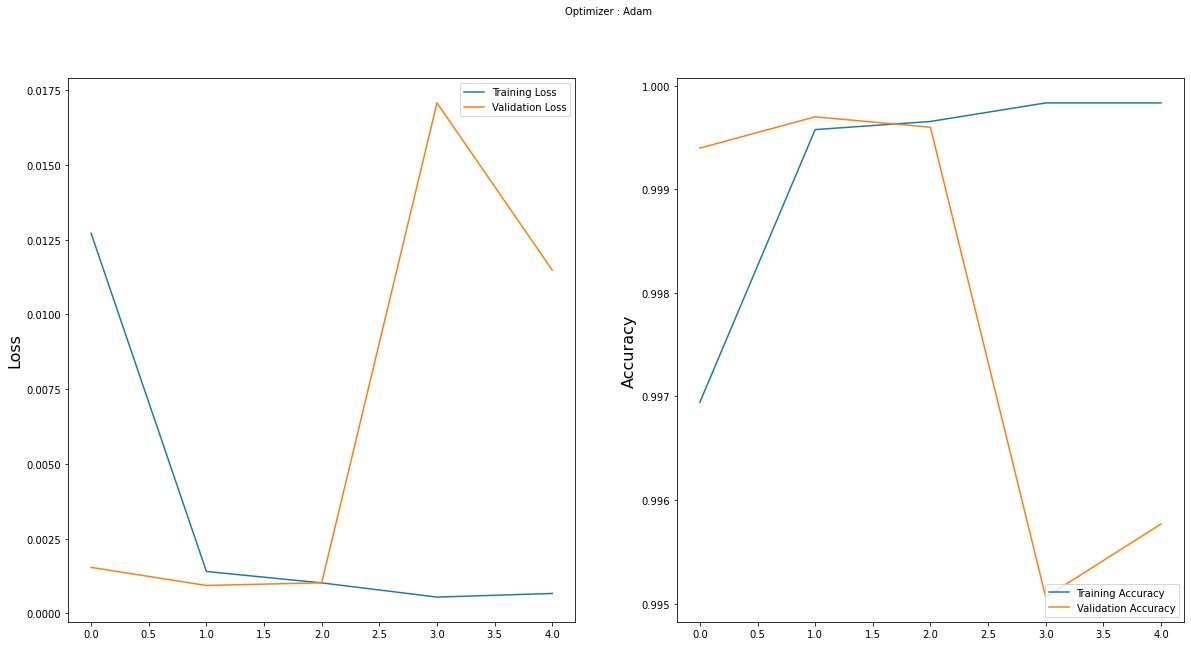

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [ ]:
#reconstructed_model = keras.models.load_model("/content/drive/MyDrive/my_modelv2")
model = keras.models.load_model('/content/drive/MyDrive/noraproject/outpsgg1')

In [ ]:
y_true = test_generator.classes

In [ ]:
y_true

array([0, 0, 0, ..., 5, 5, 5], dtype=int32)

In [ ]:
y_pred_prob = model.predict(test_generator)

In [ ]:
y_pred = tf.argmax(y_pred_prob, axis=-1)

In [ ]:
y_pred = y_pred.numpy()
y_pred

array([0, 0, 0, ..., 5, 5, 5])

In [ ]:
print(classification_report(y_true, y_pred, target_names = classes))

              precision    recall  f1-score   support

           F       1.00      0.98      0.99       161
           M       1.00      0.97      0.99      2101
           N       1.00      1.00      1.00     18926
           Q       1.00      1.00      1.00      1608
           S       1.00      1.00      1.00       556
           V       0.96      1.00      0.98      1447

    accuracy                           1.00     24799
   macro avg       0.99      0.99      0.99     24799
weighted avg       1.00      1.00      1.00     24799



In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)
cm

array([[  158,     0,     3,     0,     0,     0],
       [    0,  2048,     0,     0,     0,    53],
       [    0,     0, 18919,     0,     0,     7],
       [    0,     0,     0,  1608,     0,     0],
       [    0,     0,     0,     0,   556,     0],
       [    0,     0,     0,     0,     0,  1447]])

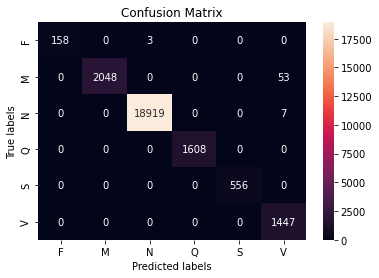

In [ ]:
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(classes); ax.yaxis.set_ticklabels(classes);

to make 100epochs save every 20 but model berform beter on 5 epochs only

In [ ]:
version = 50
epoch = 20
histories = []

for i in range(5):
  csv_logger = CSVLogger('/content/drive/MyDrive/projectecg/outpvgg/history' + str(epoch * (i + 1)) + '.log', separator=',', append=False)
  #callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)
  history = model.fit(generator, validation_data = validation_generator, epochs = epoch, callbacks = [csv_logger])
  histories.append(history)
  model.save('/content/drive/MyDrive/projectecg/outpvgg/history' + 'vgglayers.' + str(epoch * (i + 1)))

In [ ]:
# concatenate history from all the log files
hist_df = pd.DataFrame()
epoch = 20
for i in range(3):
  df = pd.read_csv('/content/drive/MyDrive/graduation /newedit2/history' + str(epoch * (i + 1)) + '.log', delimiter = ',')
  hist_df = pd.concat([hist_df, df], ignore_index = True)

hist_df

In [ ]:
scores = model.evaluate(test_generator)

In [ ]:
print("Accuracy = ", scores[1])

In [ ]:
training_scores = model.evaluate(generator)
print("Accuracy = ", training_scores[1])

In [ ]:
validation_scores = model.evaluate(validation_generator)
print("Accuracy = ", validation_scores[1])

In [ ]:
epoch = 20
for i in range(3):
  log = pd.read_csv('/content/drive/MyDrive/graduation /newedit2/history' + str(epoch * (i + 1)) + '.log')
  log = pd.DataFrame(log)
  print(log.shape)
  if(i == 0):
    logs = log.copy()
  else:
    pd.concat([logs,log])
    print(logs.shape)

In [ ]:
# summarize history for accuracy
plt.plot(hist_df['categorical_accuracy'])
plt.plot(hist_df['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# summarize history for loss
plt.plot(hist_df['loss'])
plt.plot(hist_df['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
print(k.eval(model.optimizer.lr))